# Data Preprocessing

### Importing important libraries

In [3]:
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

### Reading the Dataset

In [4]:
# Read the updated dataset
file_location = r'D:\traffic prediction\Metro_Interstate_Traffic_Volume.csv.gz'
df_raw = pd.read_csv(file_location, parse_dates=['date_time'], index_col='date_time')
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


There are 48,204 total instances, with 9 features:  

1. holiday: String indicating the presence of a holiday (None or name of the holiday).
2. temp: Temperature in degrees Kelvin.
3. rain_1h: Rainfall in mm for the last hour.
4. snow_1h: Snowfall in mm for the last hour.
5. clouds: Cloud coverage in percentage.
6. weather_main: Short descriptive text about the weather.
7. weather_description: Longer descriptive text about the weather.
8. date_time: Date and time in the format of Y/m/d H:M:S.
9. traffic_volume: Number of cars recorded in the last hour (traffic volume).

These features provide information about various factors such as weather conditions, date and time, and traffic volume, which can be used for analysis and prediction tasks.

We will deal with hourly predictions, and the data is expected to be captured at 1 hour intervals:

### Understanding the Data and statistical analysis

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [6]:
def describe(df):
    # Drop the column with non-numeric data
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Call the describe() function and skew() method on the numeric DataFrame
    result = pd.concat([df_numeric.describe().T, df_numeric.skew().rename('skew')], axis=1)
    return result

# Assuming you have a DataFrame named df_raw
result = describe(df_raw)
print(result)

                  count         mean          std  min      25%      50%  \
temp            48204.0   281.205870    13.338232  0.0   272.16   282.45   
rain_1h         48204.0     0.334264    44.789133  0.0     0.00     0.00   
snow_1h         48204.0     0.000222     0.008168  0.0     0.00     0.00   
clouds_all      48204.0    49.362231    39.015750  0.0     1.00    64.00   
traffic_volume  48204.0  3259.818355  1986.860670  0.0  1193.00  3380.00   

                     75%      max        skew  
temp             291.806   310.07   -2.247226  
rain_1h            0.000  9831.30  219.389036  
snow_1h            0.000     0.51   48.367484  
clouds_all        90.000   100.00   -0.197257  
traffic_volume  4933.000  7280.00   -0.089381  


### Check for missing values

In [7]:
df_raw.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
traffic_volume             0
dtype: int64

No missing values found.

### Data Overview

In [8]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']

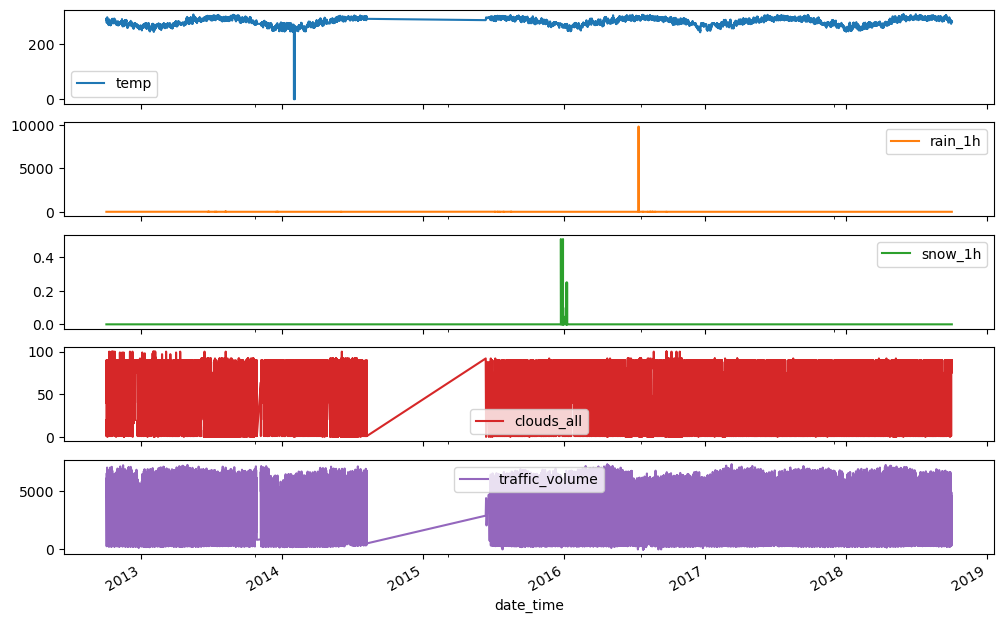

In [9]:
plot_features = df_raw[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2013-10-01 21:00:00,285.52,0.00,0.0,0,2670
2013-10-01 23:00:00,282.93,0.00,0.0,0,1299
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
...,...,...,...,...,...
2013-11-30 19:00:00,274.27,0.00,0.0,64,3532
2013-11-30 20:00:00,273.16,0.00,0.0,64,2896
2013-11-30 21:00:00,272.51,0.00,0.0,64,2603


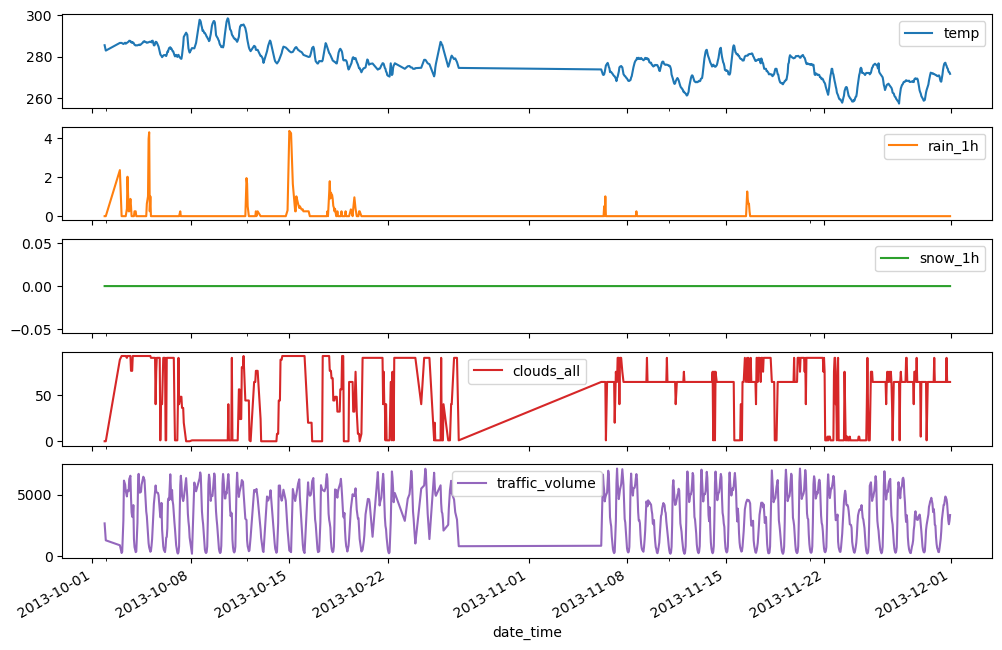

In [10]:
plot_features = df_raw[plot_cols]['2013-10':'2013-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

Data is missing records between 2013-10 and 2013-11

and data is missing records between 2014-08-08 and 2015-06-11

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-08-08 00:00:00,NaN,293.450,0.0,0.0,40,Clouds,scattered clouds,848
2014-08-08 01:00:00,NaN,292.380,0.0,0.0,1,Clear,sky is clear,516
2015-06-11 20:00:00,NaN,287.586,0.0,0.0,92,Rain,light rain,2886


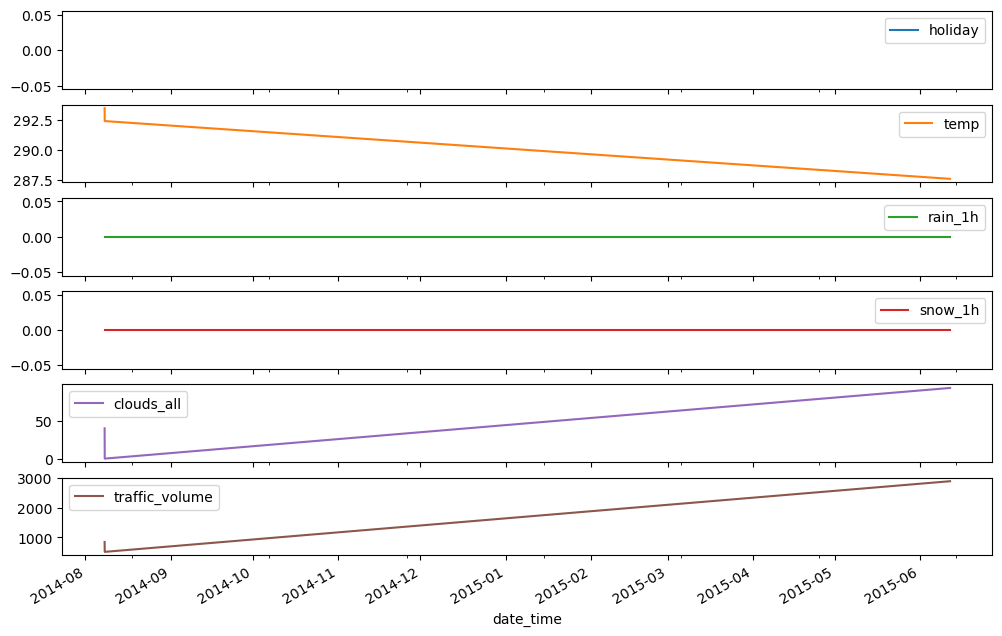

In [11]:
plot_features = df_raw['2014-08-08':'2015-06-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

### Inspect and cleanup

In [12]:
#df_raw.describe(datetime_is_numeric=True).transpose()

# Assuming you have a DataFrame named df_raw
df_numeric = df_raw.select_dtypes(include=[np.number])  # Select numeric columns
df_datetime = df_raw.select_dtypes(include=[np.datetime64])  # Select datetime columns

# Convert datetime columns to numeric
df_datetime_numeric = df_datetime.apply(pd.to_numeric, errors='coerce')

# Combine numeric and converted datetime columns
df_combined = pd.concat([df_numeric, df_datetime_numeric], axis=1)

# Use describe() method on the combined DataFrame
result = df_combined.describe().transpose()

print(result)

                  count         mean          std  min      25%      50%  \
temp            48204.0   281.205870    13.338232  0.0   272.16   282.45   
rain_1h         48204.0     0.334264    44.789133  0.0     0.00     0.00   
snow_1h         48204.0     0.000222     0.008168  0.0     0.00     0.00   
clouds_all      48204.0    49.362231    39.015750  0.0     1.00    64.00   
traffic_volume  48204.0  3259.818355  1986.860670  0.0  1193.00  3380.00   

                     75%      max  
temp             291.806   310.07  
rain_1h            0.000  9831.30  
snow_1h            0.000     0.51  
clouds_all        90.000   100.00  
traffic_volume  4933.000  7280.00  


In [13]:
df_raw.describe(include='object').transpose()

,count,unique,top,freq
holiday,61,11,Labor Day,7
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665


### Univariate Analysis

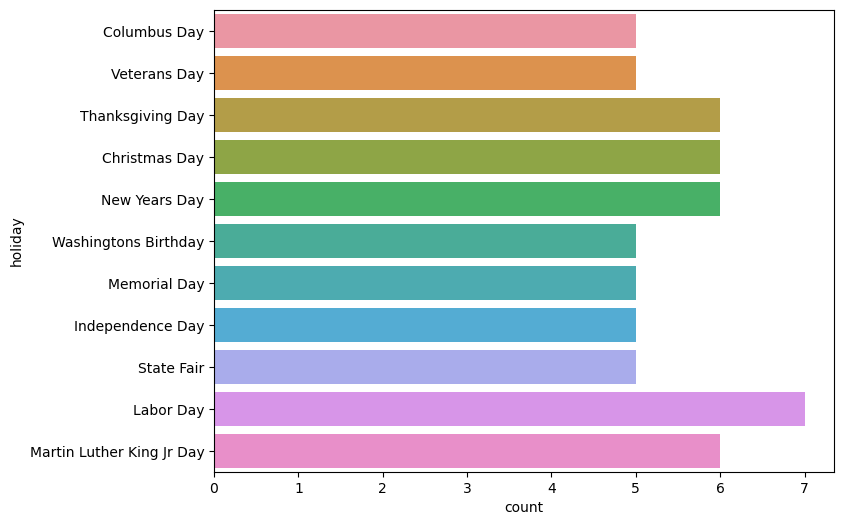

In [14]:
#Plotting frequency of each category in holiday column
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = df_raw)
plt.show()

Let's see the distribution without the None values

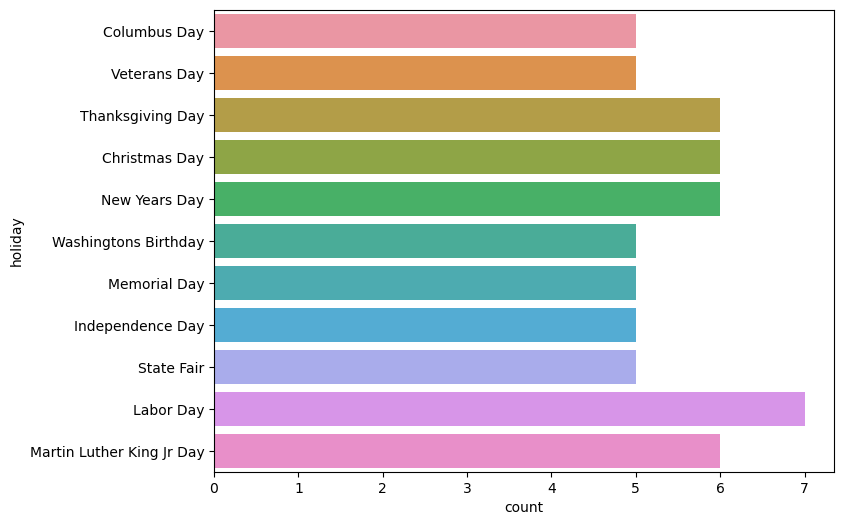

In [15]:
#'None' is far greater than the other days. Removing None data to visualize the others
holidays = df_raw.loc[df_raw.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

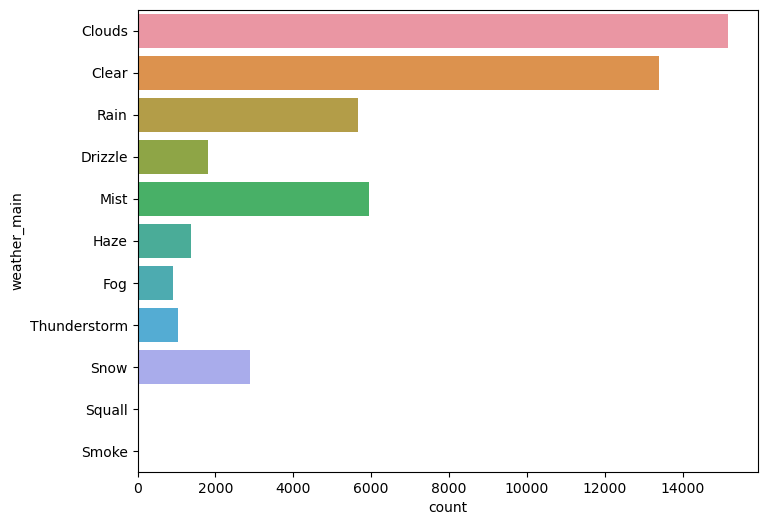

In [16]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_main', data = df_raw)
plt.show()

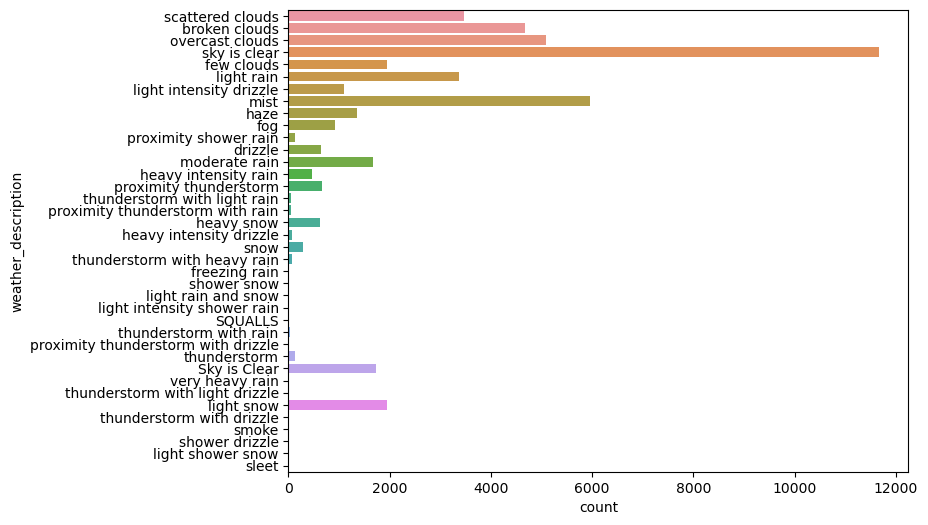

In [17]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_description', data = df_raw)
plt.show()

### checking outliers

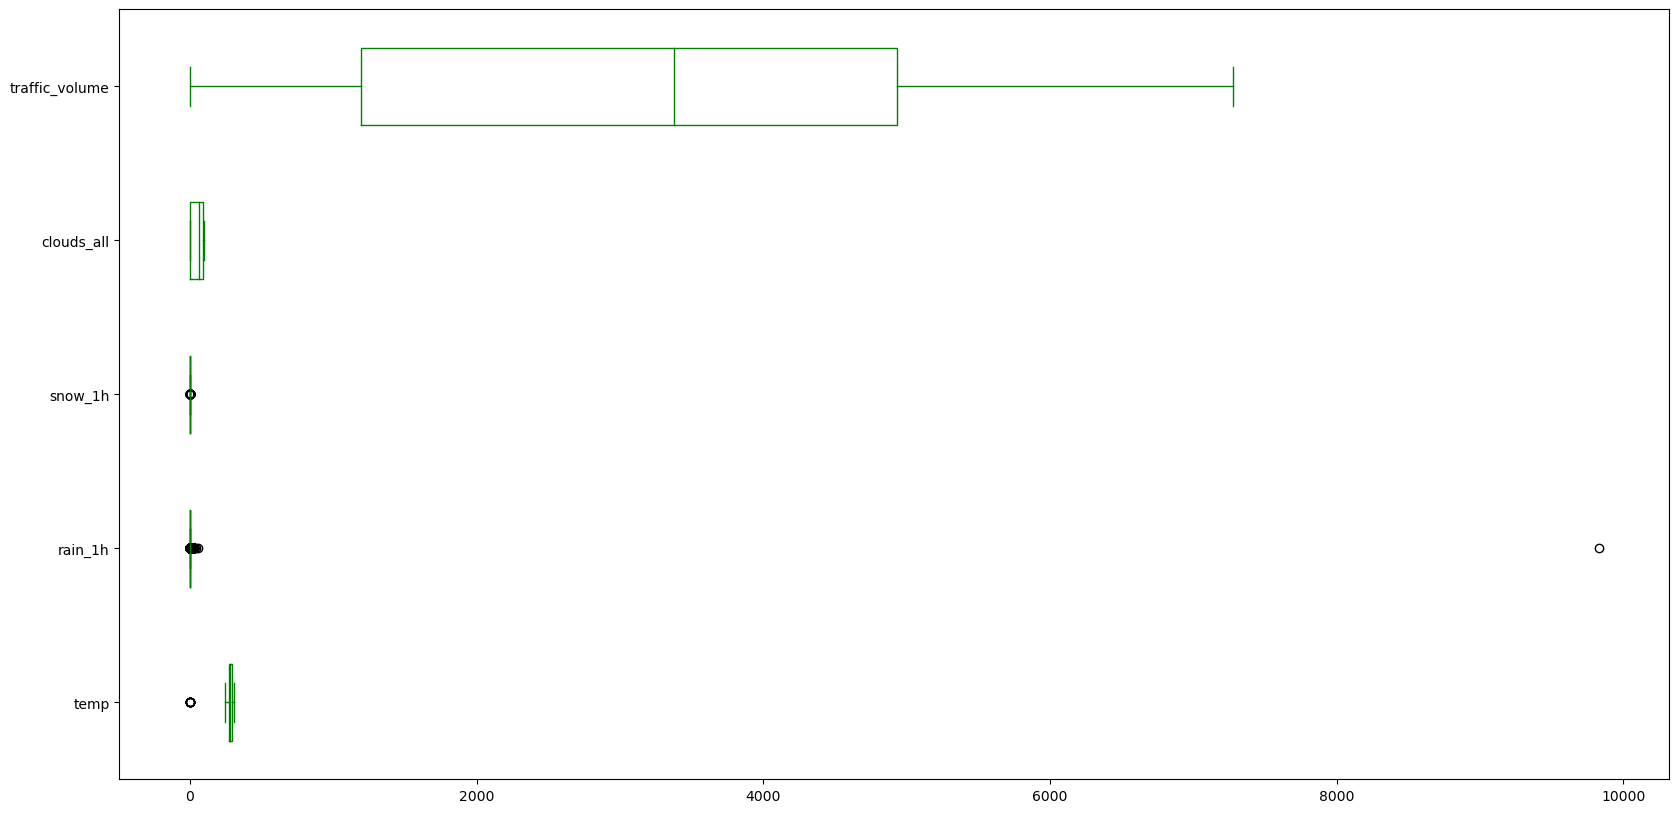

In [18]:
df_raw.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

--- 
The following observations were made that we need to take care of:

1. There is no missing data, but that does not mean that there is no inconsistent data.

2. There are temperature records at absolute zero, clearly inconsistent data.

3. rain_1h and snow_1h have many zeros and their distribution is not very well defined, since in rare moments they have high records.

5. Data is missing records between 2013-10 and 2013-11 and data is missing records between 2014-08-08 and 2015-06-11

4. 99.9% of Holiday data is None, and the other data is spread over multiple holidays
---

### Temperature

Temerature values of 0 seem to be erronoes so we will replace with the mean value of the day. We observe 2 days having erronous values [2014-01-31, 2014-02-02]

In [19]:
df_raw[df_raw.temp == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,962


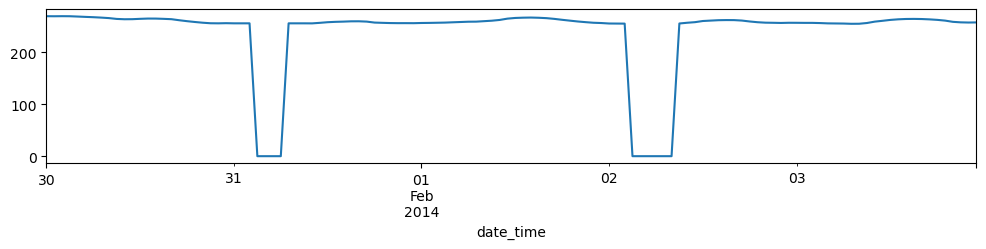

In [20]:
plot_features = df_raw['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [21]:
data_for_date = df_raw.loc['2014-01-31']
print(data_for_date)

                    holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2014-01-31 00:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 01:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 02:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 03:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 04:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 05:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 06:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 07:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 08:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 09:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 10:00:00     NaN  255.84     0.00      0.0           0   
2014-01-31 11:00:00     NaN  256.88     0.00      0.0           0   
2014-01-31 12:00:00     NaN  258.1

In [22]:
data_for_date = df_raw.loc['2014-02-02']
print(data_for_date)

                    holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2014-02-02 00:00:00     NaN  255.59      0.0      0.0           0   
2014-02-02 01:00:00     NaN  255.48      0.0      0.0           0   
2014-02-02 02:00:00     NaN  255.37      0.0      0.0           0   
2014-02-02 03:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 04:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 05:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 06:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 07:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 08:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 09:00:00     NaN  255.62      0.0      0.0           0   
2014-02-02 10:00:00     NaN  257.04      0.0      0.0           0   
2014-02-02 11:00:00     NaN  258.17      0.0      0.0           0   
2014-02-02 12:00:00     NaN  260.3

In [23]:
day_1 = df_raw.index.date == datetime.date(2014, 1, 31)
day_2 = df_raw.index.date == datetime.date(2014, 2, 2)
bad_temps = df_raw['temp'] == 0

df_1 = df_raw.copy()
# Set the zeros to NaN to be excluded from the mean
df_1.loc[bad_temps,'temp'] = np.nan 
df_1[bad_temps]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,962


In [24]:
# The means to be used for each day
print(df_1[day_1].temp.mean())
print(df_1[day_2].temp.mean())

257.14
258.4327777777778


In [25]:
df_1[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,5150


In [26]:
df_1[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,1670


Set the bad temp values to the mean of the day that it occured on

In [25]:
# Set day 1 values
df_1.loc[bad_temps & day_1, 'temp'] = df_1[day_1].temp.mean()
df_1.loc[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,5150


In [26]:
# Set day 2 values
df_1.loc[bad_temps & day_2, 'temp'] = df_1[day_2].temp.mean()
df_1.loc[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,1670


In [27]:
df_1.loc[day_1 | day_2] # Check both days after assigning the mean

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,5269


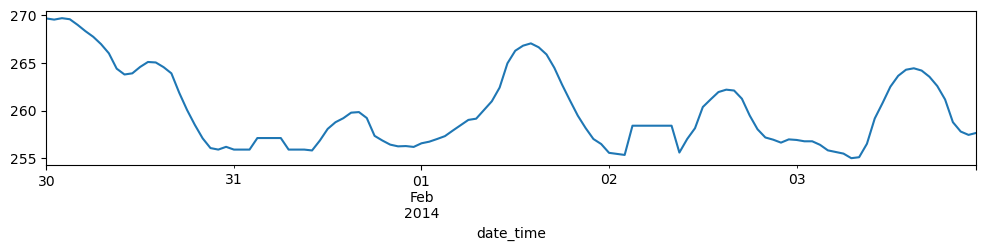

In [28]:
plot_features = df_1['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

### Rain

Rain seems to have only 1 record with extreme value, I'll just set to the general mean value of rain.

In [29]:
df_1[df_1.rain_1h > 100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2016-07-11 17:00:00,NaN,302.11,9831.3,0.0,75,Rain,very heavy rain,5535


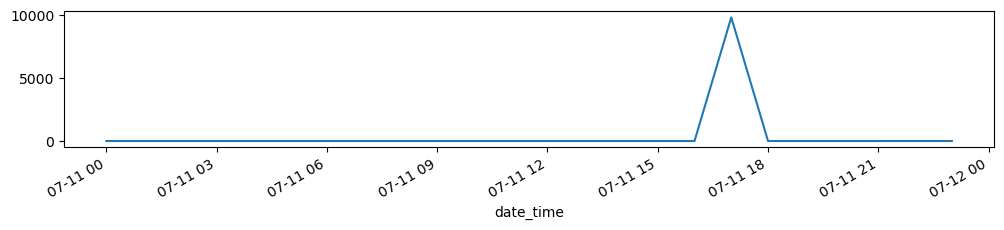

In [30]:
#plot_features = df_1['2016-07-11'].rain_1h
#_ = plot_features.plot(figsize=(12,2))

import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_1
date_label = '2016-07-11'

# Plot the specified column for the given date
plot_features = df_1.loc[date_label, 'rain_1h']
_ = plot_features.plot(figsize=(12, 2))
plt.show()

In [31]:
df_2 = df_1.copy()
df_2.loc['2016-07-11 17:00:00','rain_1h'] = np.nan
df_2.loc['2016-07-11 17:00:00','rain_1h'] = df_2.rain_1h.mean()

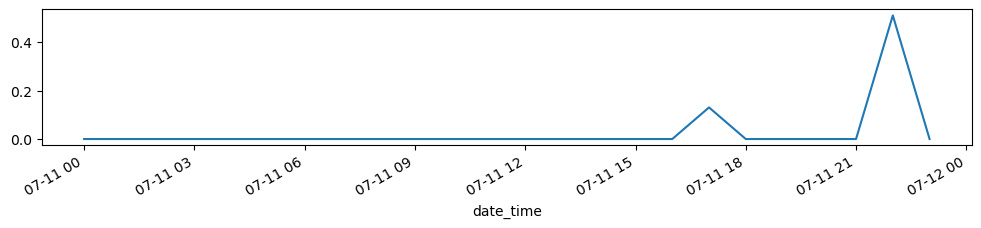

In [32]:
#plot_features = df_2['2016-07-11'].rain_1h
#_ = plot_features.plot(figsize=(12,2))

import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_2
date_label = '2016-07-11'

# Plot the specified column for the given date
plot_features = df_2.loc[date_label, 'rain_1h']
_ = plot_features.plot(figsize=(12, 2))
plt.show()

### Snow

I cannot determine if the snow has outliers or not, it seems to be an exceptional winter. I'll keep as is.

In [33]:
df_2[(df_2.snow_1h > .2)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2015-12-23 12:00:00,NaN,274.33,0.98,0.51,90,Rain,moderate rain,5167
2015-12-23 12:00:00,NaN,274.33,0.98,0.51,90,Snow,snow,5167
2015-12-23 12:00:00,NaN,274.33,0.98,0.51,90,Mist,mist,5167
2015-12-23 12:00:00,NaN,274.33,0.98,0.51,90,Fog,fog,5167
2015-12-23 14:00:00,NaN,273.74,0.00,0.32,90,Snow,light snow,5182
2015-12-23 14:00:00,NaN,273.74,0.00,0.32,90,Mist,mist,5182
2015-12-23 14:00:00,NaN,273.74,0.00,0.32,90,Rain,moderate rain,5182
2015-12-23 16:00:00,NaN,273.86,0.00,0.32,90,Snow,light snow,5222
2015-12-23 16:00:00,NaN,273.86,0.00,0.32,90,Mist,mist,5222


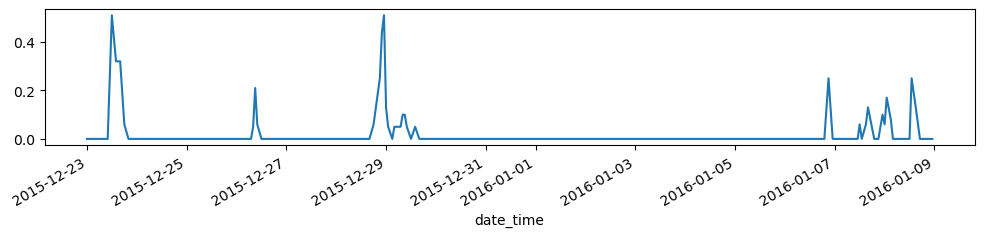

In [34]:
plot_features = df_2['2015-12-23':'2016-01-08'].snow_1h
_ = plot_features.plot(figsize=(12,2))

### Cleaned Data Overview

The data overview looks better now, but still I'm concerned with the missing data block between years 2014 and 2015.

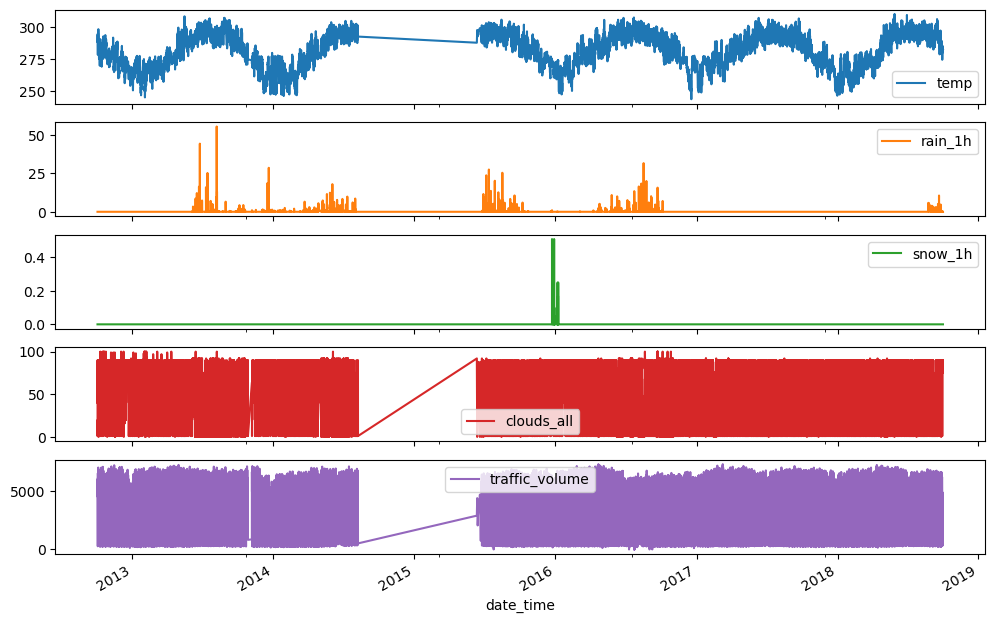

In [35]:
plot_features = df_2[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))